In [ ]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
import time

As a simple warm-up exercise, write a Python function, ‘boxfilter(n)’, that returns a box filter of size n by n. You should check that n is odd, checking and signaling an error with an ‘assert’ statement. The filter should be a Numpy array. For example, your function should work as follows:

In [ ]:
#------------------------- PART 2 ----------------------------
# QUESTION 1

def boxfilter(n):
  #check if n is even and return an error if it is
  assert(n%2 != 0)
  "Dimension must be odd"

  #make a n x n array wiht every value initialized to 0.4
  filter = [[0.4 for i in range(n)] for j in range(n)]
  return np.asarray(filter)

In [ ]:
boxfilter(3)

array([[0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4]])

In [ ]:
boxfilter(4)

AssertionError: ignored

In [ ]:
boxfilter(5)

array([[0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4]])

Write a Python function, ‘gauss1d(sigma)’, that returns a 1D Gaussian filter for a given value of sigma. The filter should be a 1D array with length 6 times sigma rounded up to the next odd integer. Each value of the filter can be computed from the Gaussian function, exp(- x^2 / (2*sigma^2)), where x is the distance of an array value from the center. This formula for the Gaussian ignores the constant factor. Therefore, you should normalize the values in the filter so that they sum to 1.

HINTS: For efficiency and compactness, it is best to avoid ‘for’ loops in Python. One way to do this is to first generate a 1D array of values for x, and map this array through the density function. Suppose you want to generate a 1D filter from a zero-centered Gaussian with a sigma of 1.6. The filter length would be odd(1.6*6)=11. You then generate a 1D array of x values [-5 -4 -3 -2 -1 0 1 2 3 4 5] and pass the 1D array through the given density function exp(- x^2 / (2*sigma^2)).

Show the filter values produced for sigma values of 0.3, 0.5, 1, and 2.

In [ ]:
# QUESTION 2

def gauss1d(sigma):

  #calculate length to be 6 times sigma rounded up to the next odd integer
  length = math.ceil(sigma*6)
  if (length%2 == 0):
    length = length + 1

  #make 0 centered array with given length
  x = np.arange(-(length/2), length/2, dtype=int)

  #apply gaussian filter and normalize values of the array
  filter = np.exp(- x**2 / (2*sigma**2))
  filter = filter/np.sum(filter)

  return filter


In [ ]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [ ]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [ ]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [ ]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

Create a Python function ‘gauss2d(sigma)’ that returns a 2D Gaussian filter for a given value of sigma. The filter should be a 2D array. Remember that a 2D Gaussian can be formed by convolution of a 1D Gaussian with its transpose. You can use the function ‘convolve2d’ in the Scipy Signal Processing toolbox to do the convolution. You will need to provide signal.convolve2d with a 2D array. To convert a 1D array, f, to a 2D array f, of the same size you use ‘f = f[np.newaxis]’

Show the 2D Gaussian filter for sigma values of 0.5 and 1.

In [ ]:
# QUESTION 3

def gauss2d(sigma):
  #create 1d gauss and transpose it
  gauss = gauss1d(sigma)
  transposed1D = np.transpose(gauss[np.newaxis])

  #apply convolution with its transpose
  filter = signal.convolve2d(gauss[np.newaxis], transposed1D)

  return filter

In [ ]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [ ]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

Write a function ‘convolve2d_manual(array, filter)’ that takes in an image (stored in `array`) and a filter, and performs convolution to the image with zero paddings (thus, the image sizes of input and output are the same). Both input variables are in type `np.float32`. Note that for this implementation you should use two for-loops to iterate through each neighbourhood.

In [ ]:
# QUESTION 4 (a)

def convolve2d_manual(array, filter):
  #pad array based on filter
  length = filter.shape[0]
  img = np.pad(array, (int(length/2),int(length/2)), 'constant', constant_values=(0,0))

  #initialize new array
  result = np.array([[0.0 for i in range(np.shape(array)[1])] for j in range(np.shape(array)[0])])

  #loop through to find convolved value
  for i in range(0, np.shape(result)[0]):
    for j in range(0, np.shape(result)[1]):
      neighbours = img[i:i+length, j:j+length]
      result[i,j] = np.sum(np.multiply(filter, neighbours))

  return result

In [ ]:
img = np.array([[1, 0, 0, 0, 1],[0, 0, 0, 1, 0], [0, 0, 1, 0, 0],[0, 0, 1, 0, 0]])
filter = boxfilter(3)
convolve2d_manual(img, filter)

array([[0.4, 0.4, 0.4, 0.8, 0.8],
       [0.4, 0.8, 0.8, 1.2, 0.8],
       [0. , 0.8, 1.2, 1.2, 0.4],
       [0. , 0.8, 0.8, 0.8, 0. ]])

 Write a function ‘gaussconvolve2d_manual(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array. Do this by first generating a filter with your ‘gauss2d’, and then applying it to the array with ‘convolve2d_manual(array, filter)’

In [ ]:
# QUESTION 4 (b)

def gaussconvolve2d_manual(array, sigma):
  gaussFilter = gauss2d(sigma)
  result = convolve2d_manual(array, gaussFilter)
  return result

In [ ]:
img = np.array([[1, 0, 0, 0, 1],[0, 0, 0, 1, 0], [0, 0, 1, 0, 0],[0, 0, 1, 0, 0]])
sigma = 0.5
gaussconvolve2d_manual(img, sigma)

array([[0.61934703, 0.08381951, 0.01134374, 0.16763901, 0.63069077],
       [0.08381951, 0.02268747, 0.16763901, 0.6420345 , 0.16763901],
       [0.        , 0.09516324, 0.71451027, 0.17898275, 0.01134374],
       [0.        , 0.09516324, 0.70316654, 0.09516324, 0.        ]])

Apply your ‘gaussconvolve2d_manual’ with a sigma of 3 on the image of the dog. Download the image (right-click on an image in your browser and choose “save as”). Load this image into Python, convert it to a greyscale, Numpy array and run your ‘gaussconvolve2d’ (with a sigma of 3). Note, as mentioned in class, for any image filtering or processing operations converting image to a double array format will make your life a lot easier and avoid various artifacts. Once all processing operations are done, you will need to covert the array back to unsigned integer format for storage and display.

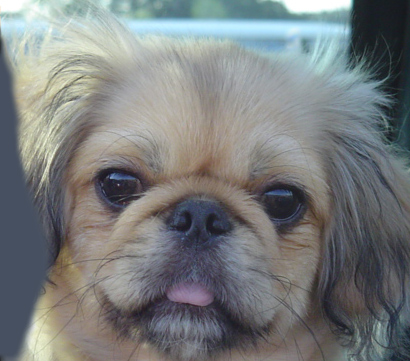

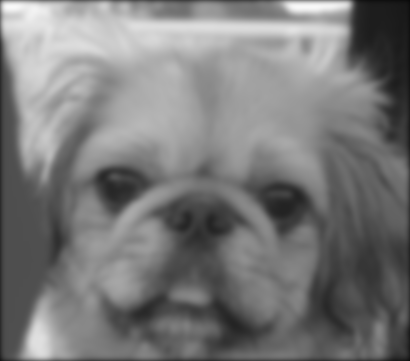

In [ ]:
# QUESTION 4 (c)

#open original dog image
dog = Image.open('dog.jpg')
display(dog)

#convert it ot grey scale and into an array
greyDog = dog.convert('L')
greyDogArray = np.asarray(greyDog)

#apply gaussconvolve2d and transform it back to an image
resultArray = gaussconvolve2d_manual(greyDogArray, 3)
result = Image.fromarray(resultArray.astype('uint8'))
result.save('dog_gauss.png','png')
img = Image.open('dog_gauss.png')
display(img)

 Write a function ‘gaussconvolve2d_scipy(array,sigma)’ that applies Gaussian convolution to a 2D array for the given value of sigma. The result should be a 2D array. Do this by first generating a filter with your ‘gauss2d’, and then applying it to the array with signal.convolve2d(array,filter,'same'). The ‘same’ option makes the result the same size as the image.

‘signal.convolve2d’ and ‘signal.correlate2d’ would be produce different results
when the filter is not symmetric cus signal.correlate2d is just correlation
but signal.convolve2d flips the filter horizontally and vertically

In [ ]:
# QUESTION 5 (a)

def gaussconvolve2d_scipy(array, sigma):
  filter = gauss2d(sigma)
  result = signal.convolve2d(array, filter, 'same')
  return result

In [ ]:
img = np.array([[1, 0, 0, 0, 1],[0, 0, 0, 1, 0], [0, 0, 1, 0, 0],[0, 0, 1, 0, 0]])
sigma = 0.5
gaussconvolve2d_scipy(img, sigma)

array([[0.61934703, 0.08381951, 0.01134374, 0.16763901, 0.63069077],
       [0.08381951, 0.02268747, 0.16763901, 0.6420345 , 0.16763901],
       [0.        , 0.09516324, 0.71451027, 0.17898275, 0.01134374],
       [0.        , 0.09516324, 0.70316654, 0.09516324, 0.        ]])

Apply your ‘gaussconvolve2d_scipy’ with a sigma of 3 on the image of the dog again. Follow instructions in part 4c for saving and loading the image.

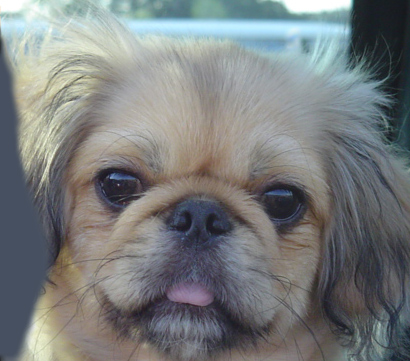

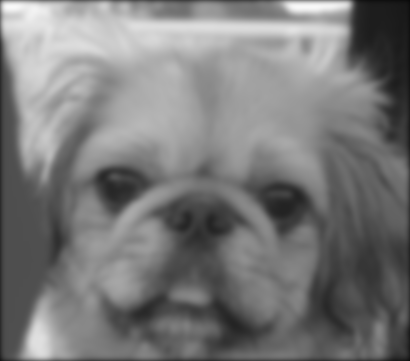

In [ ]:
# QUESTION 5 (b)

#open original dog image
dog = Image.open('dog.jpg')
display(dog)

#convert it ot grey scale and into an array
greyDog = dog.convert('L')
greyDogArray = np.asarray(greyDog)

#apply gaussconvolve2d_scipy and transform it back to an image
resultArray = gaussconvolve2d_scipy(greyDogArray, 3)
result = Image.fromarray(resultArray.astype('uint8'))
result.save('dog_gauss_scipy.png','png')
img = Image.open('dog_gauss_scipy.png')
display(img)

Experiment on how much time it takes to convolve the dog image above using your convolution implementation ‘gaussconvolve2d_manual’ and the scipy implementation ‘gaussconvolve2d’. Compare and comment on the performance using a sigma of 10.0. HINT: The following code shows you how to time a function. Also, depending on efficency of your implementation you may see different runtimes here compared to the the scipy implementation, that's OK. The key is thinking and explaining why you get a certain result.

In [ ]:
# QUESTION 6

#open original dog image
dog = Image.open('dog.jpg')

#convert it ot grey scale and into an array
greyDog = dog.convert('L')
greyDogArray = np.asarray(greyDog)

#time gaussconvolve2d_scipy
t1 = time.time() # start timestamp
resultArray = gaussconvolve2d_scipy(greyDogArray, 10)
duration = time.time() - t1 # duration in seconds
print("gaussconvolve2d_scipy time: ")
print(duration)

#time gaussconvolve2d
t1 = time.time() # start timestamp
resultArray = gaussconvolve2d_manual(greyDogArray, 10)
duration = time.time() - t1 # duration in seconds
print("gaussconvolve2d_manual time: ")
print(duration)

gaussconvolve2d_scipy time: 
1.1015241146087646
gaussconvolve2d_manual time: 
1.350205659866333


Convolution with a 2D Gaussian filter is not the most efficient way to perform Gaussian convolution on an image. In a few sentences, explain how this could be implemented more efficiently taking advantage of separability and why, indeed, this would be faster. NOTE: It is not necessary to implement this. Just the explanation is required. Your answer will be graded for clarity.

We can take advantage of the fact that the 2D Gaussian filter is separable and make a function that filters as a product of the x and y components. Normally we would have to go through each x and y pixel which results in a time of m^2 x n^2. But with a seperable 2D Gaussian, there are less multiplications needed which would result in a 2m x n^2 time thus improving the efficiency.

Choose an appropriate sigma and create a blurred version of the one of the paired images. For this to work you will need to choose a relatively large sigma and filter each of the three color channels (RGB) separately, then compose the channels back to the color image to display. Note, you should use the same sigma for all color channels.

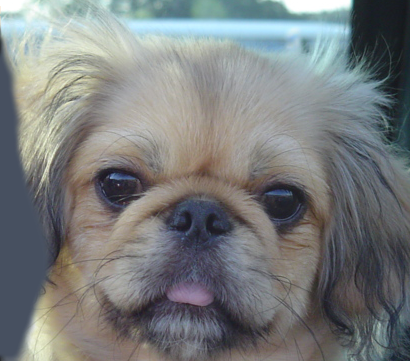

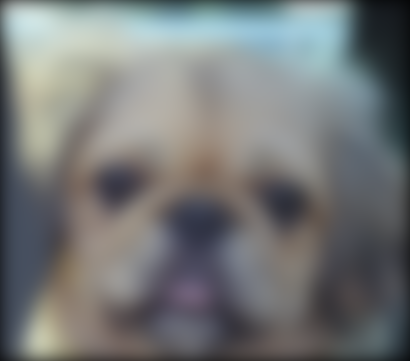

In [ ]:
# ------------------------- PART 3 ----------------------------
# QUESTION 1

#open original dog image and convert it to array
dog = Image.open('0b_dog.bmp').convert('RGB')
display(dog)

#split into 3 channels and into arrays
r, g, b = dog.split()

rArray = np.asarray(r)
gArray = np.asarray(g)
bArray = np.asarray(b)

#apply gaussconvolve2d_scipy to each colour channel
rResultArray = gaussconvolve2d_scipy(rArray, 10)
gResultArray = gaussconvolve2d_scipy(gArray, 10)
bResultArray = gaussconvolve2d_scipy(bArray, 10)

#convert back to image
rResult = Image.fromarray(rResultArray.astype('uint8'))
gResult = Image.fromarray(gResultArray.astype('uint8'))
bResult = Image.fromarray(bResultArray.astype('uint8'))

#recombine back to RGB image
result = Image.merge('RGB', (rResult, gResult, bResult))
result.save('dog_gauss.png', 'png')
img = Image.open('dog_gauss.png')
display(img)

Choose an appropriate sigma (it is suggested to use the same as above) and create a high frequency version of the second from the two the paired images. Again you will operate on each of the color channels separately and use same sigma for all channels. High frequency filtered image is obtained by first computing a low frequency Gaussian filtered image and then subtracting it from the original. The high frequency image is actually zero-mean with negative values so it is visualized by adding 128 (if you re-scaled the original image to the range between 0 and 1, then add 0.5 for visualization). In the resulting visualization illustrated below, bright values are positive and dark values are negative.

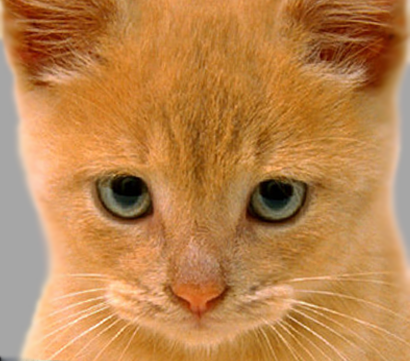

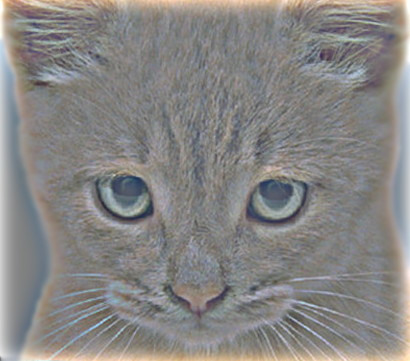

In [ ]:
# QUESTION 2

#open original cat image and convert it to array
cat = Image.open('0a_cat.bmp').convert('RGB')
display(cat)

#split into 3 channels and into arrays
r, g, b = cat.split()

rArray = np.asarray(r)
gArray = np.asarray(g)
bArray = np.asarray(b)

#apply gaussconvolve2d_scipy to each colour channel
rResultArray = gaussconvolve2d_scipy(rArray, 10)
gResultArray = gaussconvolve2d_scipy(gArray, 10)
bResultArray = gaussconvolve2d_scipy(bArray, 10)

#subtract gauss array from original array
rArray = np.subtract(rArray, rResultArray)
gArray = np.subtract(gArray, gResultArray)
bArray = np.subtract(bArray, bResultArray)

#add 128 and clamp it to 0 - 255
rArray = np.clip((rArray + 128.0), 0.0, 255.0)
gArray = np.clip((gArray + 128.0), 0.0, 255.0)
bArray = np.clip((bArray + 128.0), 0.0, 255.0)



#convert back to image
rResult = Image.fromarray(rArray.astype('uint8'))
gResult = Image.fromarray(gArray.astype('uint8'))
bResult = Image.fromarray(bArray.astype('uint8'))

#recombine back to RGB image
result = Image.merge('RGB', (rResult, gResult, bResult))
result.save('cat_gauss.png', 'png')
img = Image.open('cat_gauss.png')
display(img)

Now simply add the low and high frquency images (per channel). Note, the high frequency image that you add,should be the originally computed high friequency image (without adding 128; this addition is only done for visualizationes in the part above) You may get something like the following as a result:

In [ ]:
# QUESTION 3

def combine_images(f1, f2, sigma):
  print("sigma: ")
  print(sigma)
  #open original f1 image and convert it to array
  fileA = Image.open(f1).convert('RGB')

  #open original f2 image and convert it to array
  fileB = Image.open(f2).convert('RGB')

  #split f1 into 3 channels and into arrays
  r, g, b = fileB.split()

  BRArray = np.asarray(r)
  BGArray = np.asarray(g)
  BBArray = np.asarray(b)

  #apply gaussconvolve2d_scipy to each colour channel
  BRResultArray = gaussconvolve2d_scipy(BRArray, sigma)
  BGResultArray = gaussconvolve2d_scipy(BGArray, sigma)
  BBResultArray = gaussconvolve2d_scipy(BBArray, sigma)

  r, g, b = fileA.split()

  rArray = np.asarray(r)
  gArray = np.asarray(g)
  bArray = np.asarray(b)

  #apply gaussconvolve2d_scipy to each colour channel
  rResultArray = gaussconvolve2d_scipy(rArray, sigma)
  gResultArray = gaussconvolve2d_scipy(gArray, sigma)
  bResultArray = gaussconvolve2d_scipy(bArray, sigma)

  #subtract gauss array from original array
  rArray = np.subtract(rArray, rResultArray)
  gArray = np.subtract(gArray, gResultArray)
  bArray = np.subtract(bArray, bResultArray)

  #add arrays and clamp it to 0 - 255
  rArray = np.clip((rArray + BRResultArray), 0.0, 255.0)
  gArray = np.clip((gArray + BGResultArray), 0.0, 255.0)
  bArray = np.clip((bArray + BBResultArray), 0.0, 255.0)

  #convert back to image
  rResult = Image.fromarray(rArray.astype('uint8'))
  gResult = Image.fromarray(gArray.astype('uint8'))
  bResult = Image.fromarray(bArray.astype('uint8'))

  #recombine back to RGB image
  result = Image.merge('RGB', (rResult, gResult, bResult))
  result.save('combined.png', 'png')
  img = Image.open('combined.png')
  display(img)

sigma: 
10


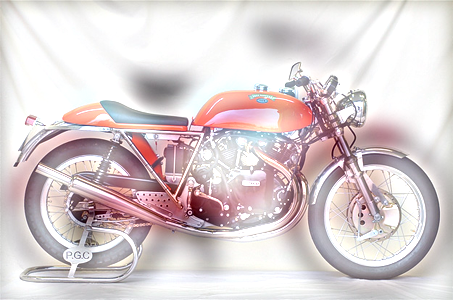

sigma: 
5


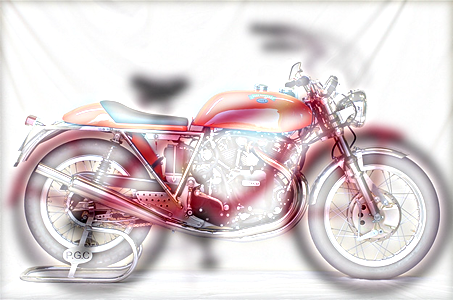

sigma: 
15


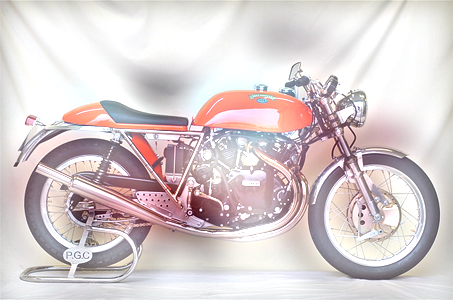

In [ ]:
combine_images('1b_motorcycle.bmp', '1a_bicycle.bmp', 10)
combine_images('1b_motorcycle.bmp', '1a_bicycle.bmp', 5)
combine_images('1b_motorcycle.bmp', '1a_bicycle.bmp', 15)

sigma: 
10


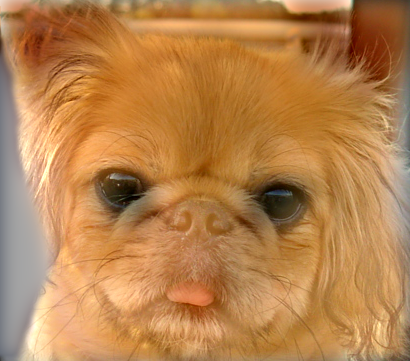

sigma: 
5


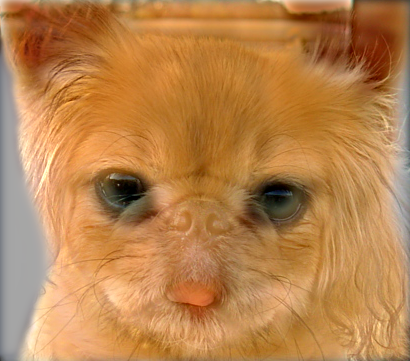

sigma: 
15


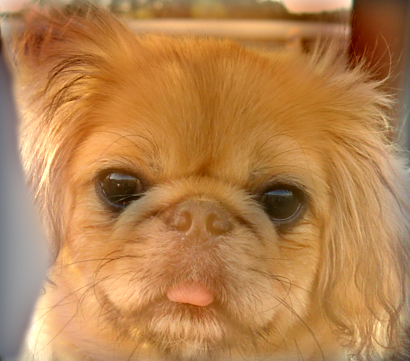

In [ ]:
combine_images('0b_dog.bmp', '0a_cat.bmp', 10)
combine_images('0b_dog.bmp', '0a_cat.bmp', 5)
combine_images('0b_dog.bmp', '0a_cat.bmp', 15)

sigma: 
10


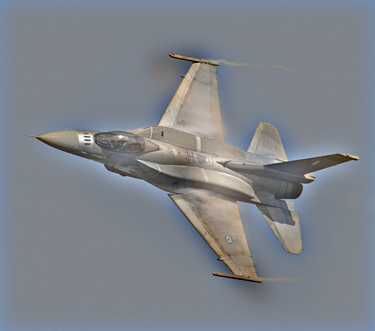

sigma: 
5


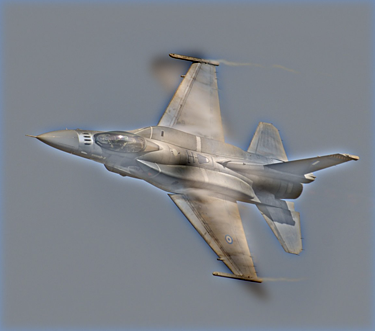

sigma: 
15


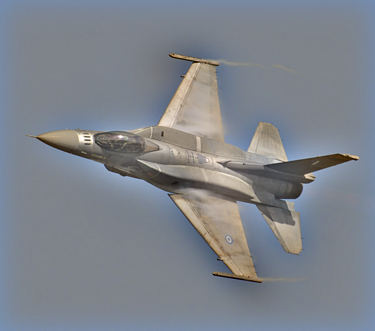

In [ ]:
combine_images('4b_plane.bmp', '4a_bird.bmp', 10)
combine_images('4b_plane.bmp', '4a_bird.bmp', 5)
combine_images('4b_plane.bmp', '4a_bird.bmp', 15)

Play with different combinations of parameters for each filter and show your best results for denoising. Include the best combinations of parameters for each filter and the corresponding resultant images in your report. Note that since you have two images and three filters, you will include a total of six denoised images.

In [ ]:
# ---------------------------- PART 4 -------------------------
# QUESTION 1

def denoise(file):
  #open image and convert to array
  img = Image.open(file)
  imgArray = np.asarray(img)

  print("Gaussian Blur: ")
  blur = cv2.GaussianBlur(imgArray, (5,5), cv2.BORDER_DEFAULT)
  result = Image.fromarray(blur.astype('uint8'))
  display(result)

  print("Bilateral Filter: ")
  bi = cv2.bilateralFilter(imgArray, 15, 80, 80, cv2.BORDER_DEFAULT)
  result = Image.fromarray(bi.astype('uint8'))
  display(result)

  print("Median Blur: ")
  med = cv2.medianBlur(imgArray, 5)
  result = Image.fromarray(med.astype('uint8'))
  display(result)

Gaussian Blur: 


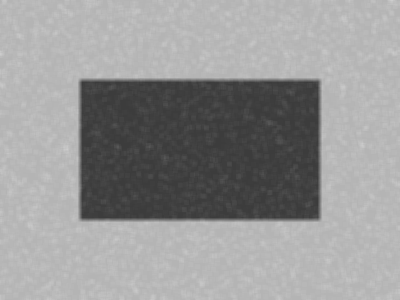

Bilateral Filter: 


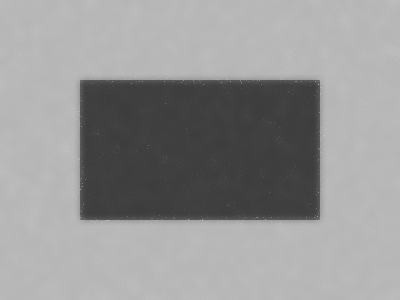

Median Blur: 


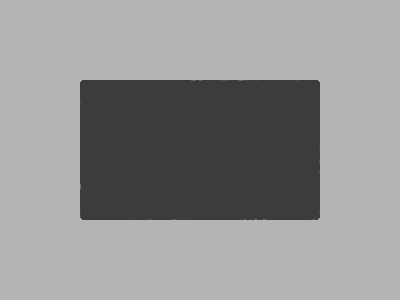

In [ ]:
denoise('box_gauss.png')

Gaussian Blur: 


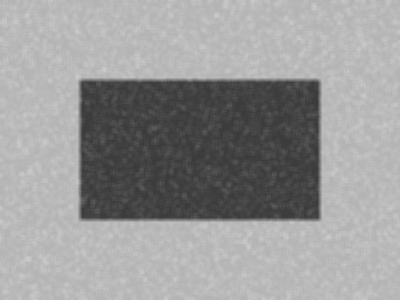

Bilateral Filter: 


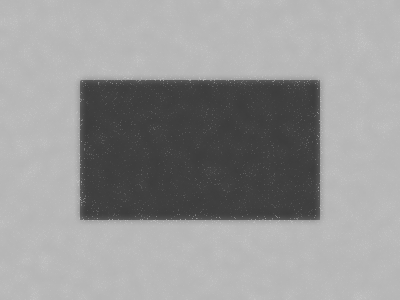

Median Blur: 


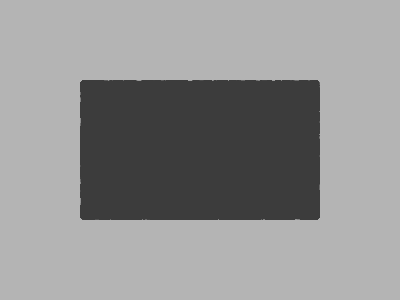

In [ ]:
denoise('box_speckle.png')

Now try to use the following combinations for the two images, and comment the pros and cons of using Gaussian, Bilateral, and Median filter. HINT: You might need to zoom in to see the artifacts clearly.

In [ ]:
# QUESTION 2

def denoise_2(file):
  #open image and convert to array
  img = Image.open(file)
  imgArray = np.asarray(img)

  print("Gaussian Blur: ")
  blur = cv2.GaussianBlur(imgArray, ksize=(7, 7), sigmaX=50)
  result = Image.fromarray(blur.astype('uint8'))
  display(result)

  print("Bilateral Filter: ")
  bi = cv2.bilateralFilter(imgArray, 7, sigmaColor=150, sigmaSpace=150)
  result = Image.fromarray(bi.astype('uint8'))
  display(result)

  print("Median Blur: ")
  med = cv2.medianBlur(imgArray,7)
  result = Image.fromarray(med.astype('uint8'))
  display(result)

The pros of using median blur appears to be that it really smoothes out everything. The image comes out looking like a cartoon. The con is that it accentuates the edges where there is high contrast and makes them wobbly. It is also not as time efficient as gaussian.

The pros of bilateral filter is that it is edge preserving. The image looks sharper than that of guassian blur. The con being that its not as time efficient and in high contrast areas, due to its edge preserving nature, it can be mistaken for an edge and lead to a blotchy image.

The gaussian blurs everything including the edges making the whole image more blurry in general. The pro being that its very time efficient since it is seperable, taking only 2m x n^2 time.

Gaussian Blur: 


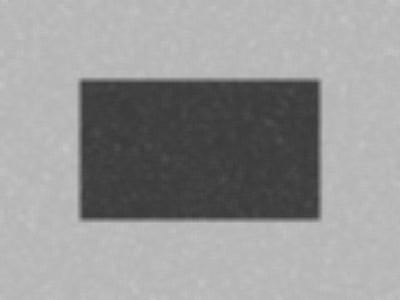

Bilateral Filter: 


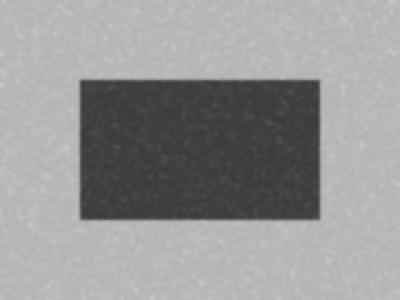

Median Blur: 


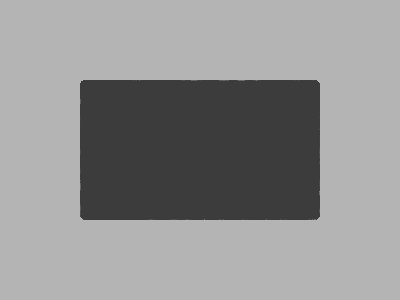

In [ ]:
denoise_2('box_gauss.png')

Gaussian Blur: 


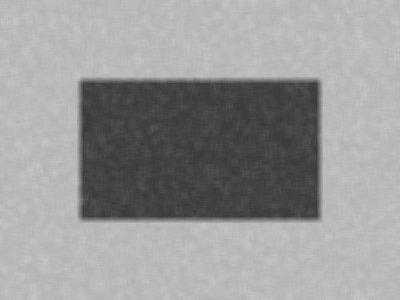

Bilateral Filter: 


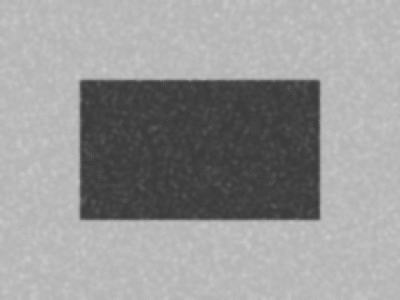

Median Blur: 


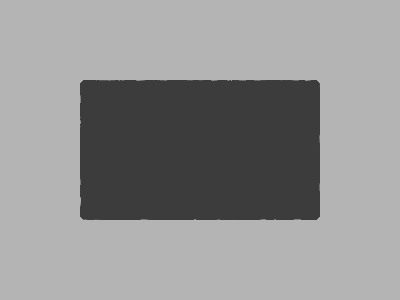

In [ ]:
denoise_2('box_speckle.png')